### Introduction to data

The dataset contains information about the adult income, where adult income depends on various factors such as education, gender, race ans so on. In this data includes 15 columns and has total of about 49k entires. We will investigate data and find out the relations between all the columns in the data with the target variable i.e income

#### Read and explore data

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
%matplotlib inline

In [57]:
df = pd.read_csv('adult.csv')

In [58]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


#### Summary of Data

Here we inspect the data momentarily. Out of the total 15 columns, there are 6 numeric variables and 8 are object types. The target variable income has binary classes that includes income above 50k and below the 50k. So we can apply classifcation model to predict personal income either it is above 50k or below 50k. 

The `age` variable ranged between 17 to 90. Similary other numerical variable show their ranges and also few percentiles. 

When checking data for first 5 rows, we see there is some data point that has `?` instead of right value. We should replace these before we do further analysis. 

What are these different columns in data:

> age : age of the person


In [61]:
# replace '?' with nan
df[df=='?'] = np.nan


In [62]:
# again get info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [63]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'educational-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

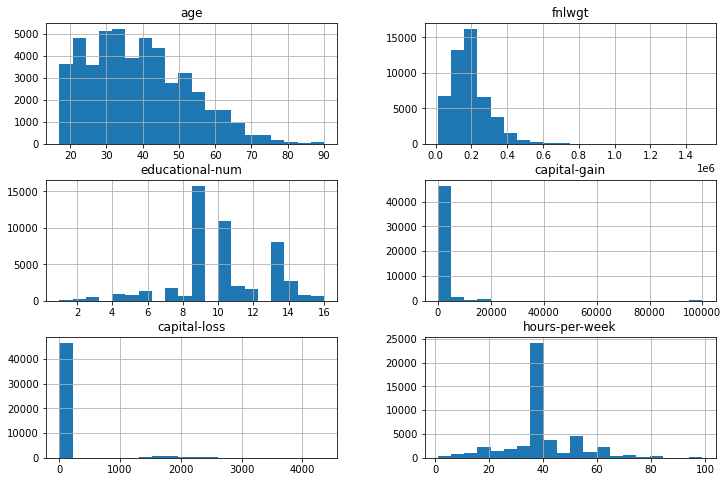

In [64]:
# give first glance of data distribution
df.hist(bins = 20, figsize= (12,8))


<AxesSubplot:>

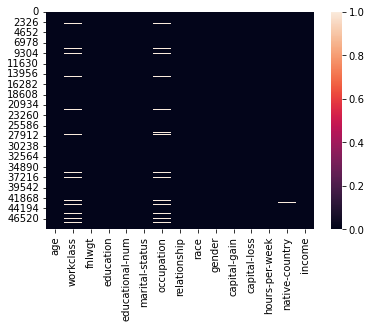

In [65]:
# check missing value in data
sns.heatmap(df.isnull())

In [66]:
df.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,46043,4.884200e+04,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


> In above plots, we see we have column with value of `?`, we are replacing those values with `null`. We also check the numerical data distribution of few attributes, where both `capital-gain` and `capital-loss` has large number of values which have single values. We can drop those columns from futher analysis.

In [67]:
# check two different education variable
print(df['education'].unique())
print(df['educational-num'].unique())

['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]


> It looks like `education` values are representing by number in the `educational-num` attributes. So we can drop `education` from further analysis as well.

#### Categorized data based on age group

> We want to further investigate income based of different age group. So we are going to create an age group categories.

In [68]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    else:
        return "Greater than 60"

df['age_group'] = df['age'].apply(age_group)

In [69]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'age_group'],
      dtype='object')

Text(0.5, 1.0, 'Income of Individuals of Different Age Groups')

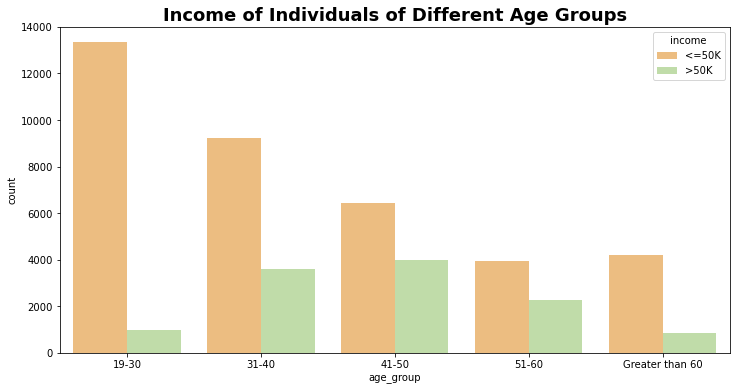

In [70]:
plt.figure(figsize=(12,6))
order_list = ['19-30', '31-40', '41-50', '51-60', 'Greater than 60']
sns.countplot(data= df, x=df['age_group'], hue = df['income'], palette='Spectral', order = order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')

> Large number of with salary less than 50k are falls under age group of 19-30 whereas group 41-50 has highest number of people with salary greater than 50k 

[Text(0, 0, '7387'),
 Text(0, 0, '927'),
 Text(0, 0, '1077'),
 Text(0, 0, '561'),
 Text(0, 0, '530'),
 Text(0, 0, '938'),
 Text(0, 0, '2'),
 Text(0, 0, '0')]

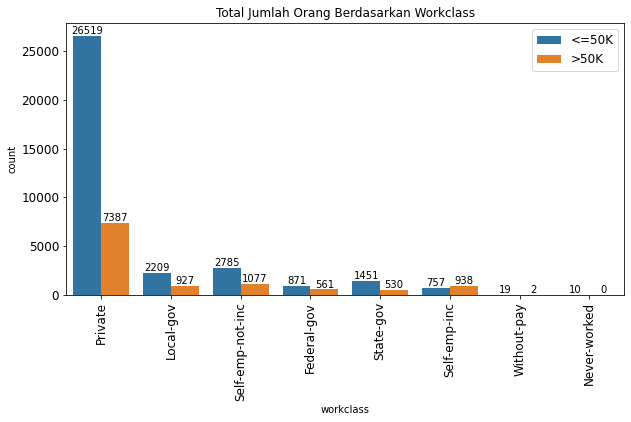

In [71]:
plt.figure(figsize=(10,5))

ax = sns.countplot(data=df, x=df['workclass'], hue = df['income'])
plt.title('Total Jumlah Orang Berdasarkan Workclass', fontsize=12)
plt.xticks(fontsize=12,rotation = 90)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

> People working at private sector had low income relative to other sector. Self-employed are the one who earn more money.

In [72]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'age_group'],
      dtype='object')

[Text(0, 0, '9918'), Text(0, 0, '1769')]

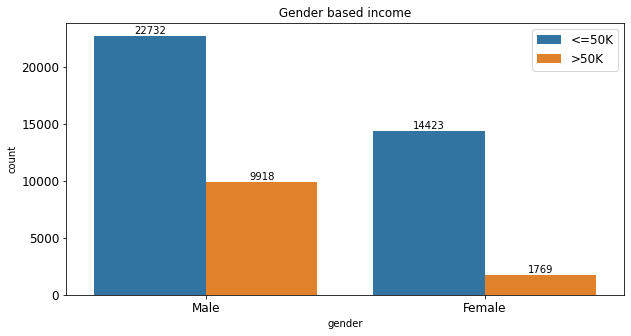

In [73]:
plt.figure(figsize=(10,5))

ax = sns.countplot(data=df, x=df['gender'], hue = df['income'])
plt.title(' Gender based income ', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

<AxesSubplot:>

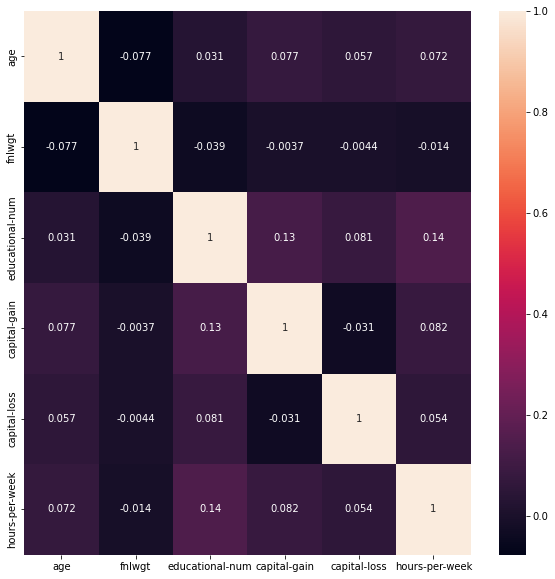

In [74]:
plt.figure(figsize=(10, 10))
sns.heatmap( 
            df.corr(),
            
            annot=True
)